In [1]:
from tensorflow import keras
import data_reader

2023-10-16 12:58:24.302229: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/songye/opt/anaconda3/envs/aiffel/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
EPOCHS = 20

In [3]:
dr = data_reader.DataReader()

Reading Data...


Data Read Done!
Training X Size : (120, 4)
Training Y Size : (120,)
Test X Size : (30, 4)
Test Y Size : (30,)




In [4]:
model = keras.Sequential([
    keras.layers.Dense(4),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(3,activation='softmax')
])

2023-10-16 12:58:28.985812: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (5, 4)                    20        
                                                                 
 dense_1 (Dense)             (5, 128)                  640       
                                                                 
 dropout (Dropout)           (5, 128)                  0         
                                                                 
 dense_2 (Dense)             (5, 3)                    387       
                                                                 
Total params: 1,047
Trainable params: 1,047
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(optimizer='adam',metrics=['accuracy'],
              loss='sparse_categorical_crossentropy')

In [6]:
print("START TRAINING")

START TRAINING


In [7]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)
history = model.fit(dr.train_X, dr.train_Y, batch_size=5, epochs=EPOCHS,
                    validation_data=(dr.test_X, dr.test_Y), callbacks=[early_stop])

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
 1/24 [>.............................] - ETA: 16s - loss: 1.1272 - accuracy: 0.2000WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fd0963019e0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and

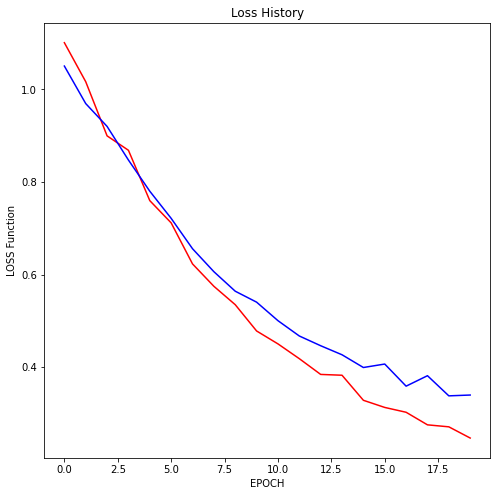

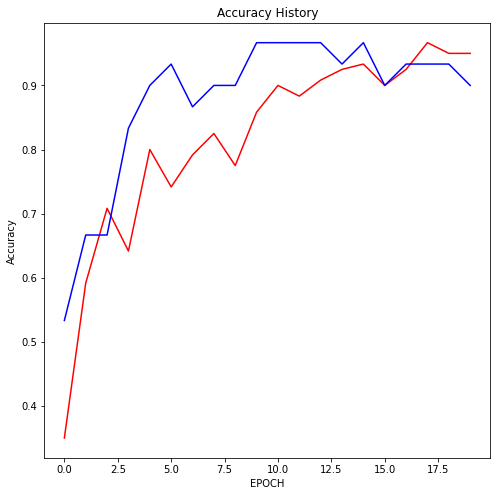

In [17]:
data_reader.draw_graph(history)